In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as web  
from scipy.stats import norm 
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
ticker = 'PG'  
data = pd.DataFrame()
data[ticker] = web.DataReader(ticker, data_source='yahoo', start='2007-1-1', end='2017-3-21')['Adj Close']

In [4]:
log_returns = np.log(1 + data.pct_change())

<br /><br />
$$
{\LARGE S_t = S_{t-1} \mathbin{\cdot} e^{((r - \frac{1}{2} \cdot stdev^2) \mathbin{\cdot} \delta_t + stdev \mathbin{\cdot} \sqrt{\delta_t} \mathbin{\cdot} Z_t)}  }
$$
<br /><br />

In [5]:
log_returns.tail()

,PG
Date,
2017-03-15,0.004386
2017-03-16,0.000437
2017-03-17,-0.004823
2017-03-20,0.002415
2017-03-21,-0.000329


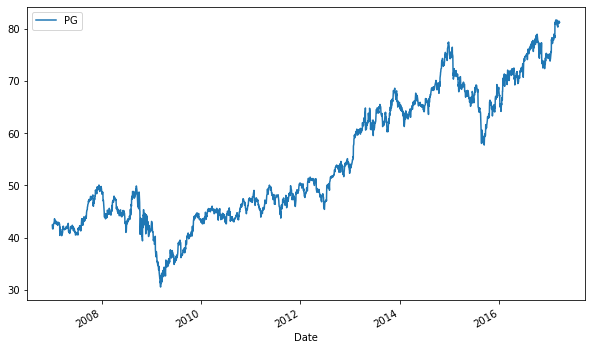

In [6]:
data.plot(figsize=(10, 6));

In [7]:
r = 0.025 #TLR

In [8]:
stdev = log_returns.std() * 250 ** 0.5
stdev

PG    0.17655
dtype: float64

In [9]:
type(stdev)

pandas.core.series.Series

In [10]:
stdev = stdev.values
stdev

array([0.17655013])

In [11]:
T = 1.0 
t_intervals = 250 
delta_t = T / t_intervals  
iterations = 10000  

In [12]:
Z = np.random.standard_normal((t_intervals + 1, iterations))  
S = np.zeros_like(Z) 
S0 = data.iloc[-1]  
S[0] = S0 

for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])

In [13]:
S

array([[ 81.22732544,  81.22732544,  81.22732544, ...,  81.22732544,
         81.22732544,  81.22732544],
       [ 81.79070593,  80.97712724,  79.18329878, ...,  81.91780002,
         81.21177975,  81.84223439],
       [ 80.77736436,  81.52794818,  78.3839712 , ...,  79.93447586,
         82.23232026,  81.74793614],
       ...,
       [129.42508194,  90.54364189,  84.16207113, ...,  95.96406294,
         54.70470585,  70.29351504],
       [127.35294634,  90.03107709,  83.89871709, ...,  97.3438575 ,
         54.18342481,  69.84771025],
       [125.58271351,  90.01881328,  84.68791196, ...,  96.70492576,
         54.86871948,  69.93388229]])

In [14]:
S.shape

(251, 10000)

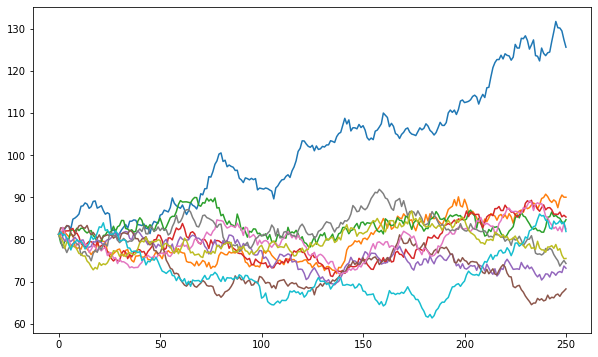

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10]);

******

In [16]:
p = np.maximum(S[-1] - 110, 0)

In [17]:
p

array([15.58271351,  0.        ,  0.        , ...,  0.        ,
        0.        ,  0.        ])

In [18]:
p.shape

(10000,)

Use the following formula to forecast the price of a stock option.   
$$
C = \frac{exp(-r \cdot T) \cdot \sum{p_i}}{iterations}
$$

In [19]:
C = np.exp(-r * T) * np.sum(p) / iterations
C  

0.45225868569296973